In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [276]:
df = pd.read_csv('vvpd.csv')
dfHouse = df.loc[df['chamber'] == 'House']
dfSenate = df.loc[df['chamber'] == 'Senate']

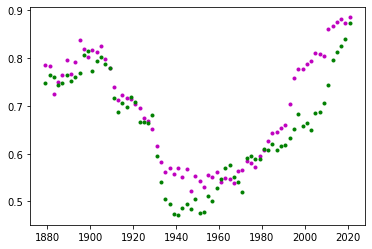

In [26]:
party_mean_diff_d1 = dfHouse['party.mean.diff.d1']
plt.plot(dfHouse['year'], party_mean_diff_d1, marker='.', linestyle='None', color='m')
plt.plot(dfSenate['year'], dfSenate['party.mean.diff.d1'], marker = '.', linestyle='None', color='g')
plt.show()

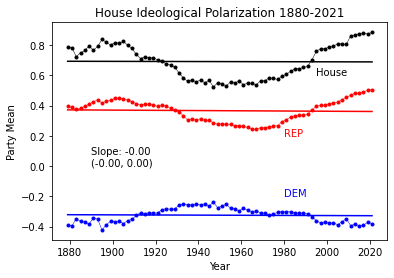

Slope: -2.9019728804113113e-05
Confidence Interval: [-0.0002953198421815115, 0.00023728038457328525


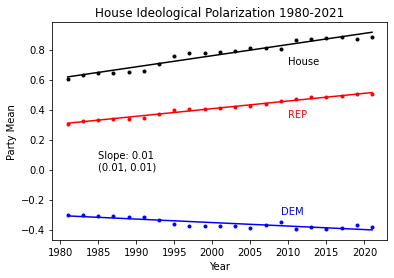

Slope: 0.007438898480491027
Confidence Interval: [0.006805071850753643, 0.008072725110228413


In [193]:
dfHouseRep = dfHouse['rep.mean.d1']
dfHouseDem = dfHouse['dem.mean.d1']

years = dfHouse['year']

x = years


#House Graph 1880-2021
y = dfHouseRep
m, b, _, p, e = st.linregress(x, y)
plt.plot(x, m*np.array(x) + b, color="red")

y = dfHouseDem
m, b, _, p, e = st.linregress(x, y)
plt.plot(x, m*np.array(x) + b, color="blue")

dfHouseBlack = []
for y in range(len(dfHouse)):
    dfHouseBlack.append(dfHouse['rep.mean.d1'][y] - dfHouse['dem.mean.d1'][y])

y = dfHouseBlack
mB, bB, _B, pB, eB = st.linregress(x, y)
plt.plot(x, mB*np.array(x) + bB, color="black")

plt.plot(dfHouse['year'], dfHouse['rep.mean.d1'], marker = '.', linewidth=0.5, color = 'r')
plt.plot(dfHouse['year'], dfHouse['dem.mean.d1'], marker = '.', linewidth=0.5, color = 'b')
plt.plot(dfHouse['year'], dfHouseBlack, marker = '.', linewidth=0.5, color = '#000000')
plt.xlabel("Year")
plt.ylabel("Party Mean")
plt.title("House Ideological Polarization 1880-2021")
plt.text(1980, 0.2, "REP", color="r")
plt.text(1995, 0.6, "House")
plt.text(1980, -0.2, "DEM", color="b")

lower_confidence_interval, upper_confidence_interval = mB - 1.96 * e,  mB + 1.96 * e
plt.text(1890, 0.0, f"Slope: {mB:.2f}\n({lower_confidence_interval:.2f}, {upper_confidence_interval:.2f})")

plt.show()

print("Slope: {}".format(mB))
print("Confidence Interval: [{}, {}".format(lower_confidence_interval, upper_confidence_interval))

#-------------------------------------------------------------------------------------------------------

#House Graph 1980 - 2021
dfHouseRepSlice = dfHouseRep.loc[dfHouse['year'] >= 1981]
dfHouseDemSlice = dfHouseDem.loc[dfHouse['year'] >= 1981]
years = dfHouseSlice['year']
x = years

y = dfHouseRepSlice
m, b, _, p, e = st.linregress(x, y)
plt.plot(x, m*np.array(x) + b, color="red")

y = dfHouseDemSlice
m, b, _, p, e = st.linregress(x, y)
plt.plot(x, m*np.array(x) + b, color="blue")

dfHouseBlackSlice = []
for y in range(len(dfHouseRepSlice)):
    dfHouseBlackSlice.append(dfHouseRepSlice[y + 51] - dfHouseDemSlice[y + 51])

y = dfHouseBlackSlice
mB, bB, _B, pB, eB = st.linregress(x, y)
plt.plot(x, mB*np.array(x) + bB, color="black")
plt.plot(years, dfHouseRepSlice, marker = '.', linestyle='None', color = 'r')
plt.plot(years, dfHouseDemSlice, marker = '.', linestyle='None', color = 'b')
plt.plot(years, dfHouseBlackSlice, marker = '.', linestyle='None', color = '#000000')
plt.xlabel("Year")
plt.ylabel("Party Mean")
plt.title("House Ideological Polarization 1980-2021")
plt.text(2010, 0.7, "House", color="#000000")
plt.text(2010, 0.35, "REP", color = "r")
plt.text(2009, -0.3, "DEM", color="b")

lower_confidence_interval, upper_confidence_interval = mB - 1.96 * e,  mB + 1.96 * e
plt.text(1985, 0.0, f"Slope: {mB:.2f}\n({lower_confidence_interval:.2f}, {upper_confidence_interval:.2f})")

plt.show()

print("Slope: {}".format(mB))
print("Confidence Interval: [{}, {}".format(lower_confidence_interval, upper_confidence_interval))


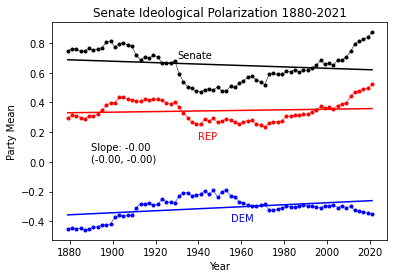

Slope: -0.0004769730269460145
Confidence Interval: [-0.0008414247215439477, -0.00011252133234808132


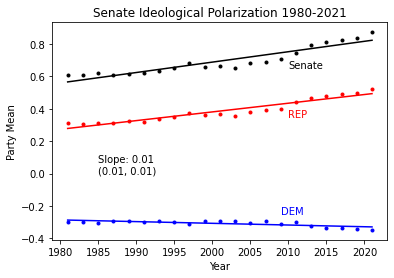

Slope: 0.006435298670863858
Confidence Interval: [0.006001667160522413, 0.006868930181205304


In [173]:
dfSenateRep = dfSenate['rep.mean.d1']
dfSenateDem = dfSenate['dem.mean.d1']
years = dfSenate['year']
x = years

#House Graph 1880-2021
y = dfSenateRep
mRep, b, _, p, e = st.linregress(x, y)
plt.plot(x, mRep*np.array(x) + b, color="red")

y = dfSenateDem
mDem, b, _, p, e = st.linregress(x, y)
plt.plot(x, mDem*np.array(x) + b, color="blue")

dfSenateBlack = []
for y in range(len(dfSenate)):
    dfSenateBlack.append(dfSenateRep[y + 72] - dfSenateDem[y + 72])

y = dfSenateBlack
mB, bB, _B, pB, eB = st.linregress(x, y)
plt.plot(x, mB*np.array(x) + bB, color="black")

plt.plot(years, dfSenateRep, marker = '.', linewidth=0.5, color = 'r')
plt.plot(years, dfSenateDem, marker = '.', linewidth=0.5, color = 'b')
plt.plot(years, dfSenateBlack, marker = '.', linewidth=0.5, color = '#000000')
plt.xlabel("Year")
plt.ylabel("Party Mean")
plt.title("Senate Ideological Polarization 1880-2021")
plt.text(1930, 0.7, "Senate", color="black")
plt.text(1940, 0.15, "REP", color='r')
plt.text(1955, -0.4, "DEM", color="b")
#
lower_confidence_interval, upper_confidence_interval = mB - 1.96 * e,  mB + 1.96 * e
plt.text(1890, 0.0, f"Slope: {mB:.2f}\n({lower_confidence_interval:.2f}, {upper_confidence_interval:.2f})")

plt.show()
print("Slope: {}".format(mB))
print("Confidence Interval: [{}, {}".format(lower_confidence_interval, upper_confidence_interval))
#-------------------------------------------------------------------------------------------------------

#House Graph 1980 - 2021
dfSenateRepSlice = dfSenateRep.loc[dfSenate['year'] >= 1981]
dfSenateDemSlice = dfSenateDem.loc[dfSenate['year'] >= 1981]
years = dfHouseSlice['year']
x = years

y = dfSenateRepSlice
m, b, _, p, e = st.linregress(x, y)
plt.plot(x, m*np.array(x) + b, color="red")

y = dfSenateDemSlice
m, b, _, p, e = st.linregress(x, y)
plt.plot(x, m*np.array(x) + b, color="blue")

dfSenateBlackSlice = []
for y in range(len(dfSenateRepSlice)):
    dfSenateBlackSlice.append(dfSenateRepSlice[y + 123] - dfSenateDemSlice[y + 123])
y = dfSenateBlackSlice
mB, bB, _B, pB, eB = st.linregress(x, y)
plt.plot(x, mB*np.array(x) + bB, color="black")

plt.plot(years, dfSenateRepSlice, marker = '.', linestyle='None', color = 'r')
plt.plot(years, dfSenateDemSlice, marker = '.', linestyle='None', color = 'b')
plt.plot(years, dfSenateBlackSlice, marker = '.', linestyle='None', color = '#000000')
plt.xlabel("Year")
plt.ylabel("Party Mean")
plt.title("Senate Ideological Polarization 1980-2021")
plt.text(2010, 0.65, "Senate", color="#000000")
plt.text(2010, 0.35, "REP", color = "r")
plt.text(2009, -0.25, "DEM", color="b")

lower_confidence_interval, upper_confidence_interval = mB - 1.96 * e,  mB + 1.96 * e
plt.text(1985, 0.0, f"Slope: {mB:.2f}\n({lower_confidence_interval:.2f}, {upper_confidence_interval:.2f})")

plt.show()
print("Slope: {}".format(mB))
print("Confidence Interval: [{}, {}".format(lower_confidence_interval, upper_confidence_interval))

print("Slope: {}".format(mB))
print("Confidence Interval: [{}, {}".format(lower_confidence_interval, upper_confidence_interval))


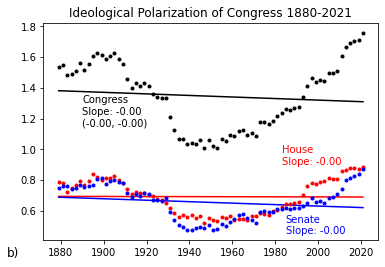

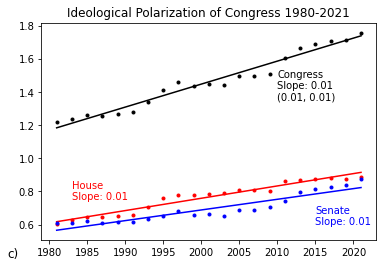

In [274]:
dfHouseBlack = []
for y in range(len(dfHouse)):
    dfHouseBlack.append(dfHouse['rep.mean.d1'][y] - dfHouse['dem.mean.d1'][y])

dfSenateBlack = []
for y in range(len(dfSenate)):
    dfSenateBlack.append(dfSenateRep[y + 72] - dfSenateDem[y + 72])

x = dfHouse['year']

y = dfHouseBlack
mH, bH, _H, pH, eH = st.linregress(x, y)
plt.plot(x, mH*np.array(x) + bH, color="red")

y = dfSenateBlack
mS, bS, _S, pS, eS = st.linregress(x, y)
plt.plot(x, mS*np.array(x) + bS, color="blue")

dfChamberDiff = []
for y in range(len(dfHouse)):
    dfChamberDiff.append(dfHouseBlack[y] + dfSenateBlack[y])
y = dfChamberDiff
mB, bB, _B, pB, eB = st.linregress(x, y)
plt.plot(x, mB*np.array(x) + bB, color="black")


plt.plot(x, dfHouseBlack, marker = '.', linestyle='None', color = 'red')
plt.plot(x, dfSenateBlack, marker = '.', linestyle='None', color = 'blue')
plt.plot(x, dfChamberDiff, marker = '.', linestyle='None', color = 'black')
#plt.ylabel("Distance Between Party Means")
plt.title("Ideological Polarization of Congress 1880-2021")

lower_confidence_interval, upper_confidence_interval = mB - 1.96 * e,  mB + 1.96 * e
plt.text(1890, 1.15, f"Congress\nSlope: {mB:.2f}\n({lower_confidence_interval:.2f}, {upper_confidence_interval:.2f})")
plt.text(1983, 0.9, f"House\nSlope: {mH:.2f}", color = "r")
plt.text(1985, 0.45, f"Senate\nSlope: {mS:.2f}", color="b")
plt.text(1855, 0.3, "b)", fontsize='large')
plt.show()


#Graph from 1980
#------------------------------------------------------------------------------------------------------------------------------------
dfHouseBlackSlice = dfHouse.loc[dfHouse['year'] >= 1981]
dfSenateBlackSlice = dfSenate.loc[dfSenate['year'] >= 1981]
years = dfHouseBlackSlice['year']
x = years

dfHouseBlack = []
for y in range(len(dfHouseRepSlice)):
    dfHouseBlack.append(dfHouse['rep.mean.d1'][y + 51] - dfHouse['dem.mean.d1'][y + 51])

dfSenateBlack = []
for y in range(len(dfSenateRepSlice)):
    dfSenateBlack.append(dfSenateRep[y + 123] - dfSenateDem[y + 123])


y = dfHouseBlack
mH, bH, _H, pH, eH = st.linregress(x, y)
plt.plot(x, mH*np.array(x) + bH, color="red")

y = dfSenateBlack
mS, bS, _S, pS, eS = st.linregress(x, y)
plt.plot(x, mS*np.array(x) + bS, color="blue")

dfChamberDiff = []
for y in range(len(dfHouseRepSlice)):
    dfChamberDiff.append(dfHouseBlack[y] + dfSenateBlack[y])
y = dfChamberDiff
mB, bB, _B, pB, eB = st.linregress(x, y)
plt.plot(x, mB*np.array(x) + bB, color="black")


plt.plot(x, dfHouseBlack, marker = '.', linestyle='None', color = 'red')
plt.plot(x, dfSenateBlack, marker = '.', linestyle='None', color = 'blue')
plt.plot(x, dfChamberDiff, marker = '.', linestyle='None', color = 'black')
#plt.ylabel("Distance Between Party Means")
plt.title("Ideological Polarization of Congress 1980-2021")

lower_confidence_interval, upper_confidence_interval = mB - 1.96 * e,  mB + 1.96 * e

plt.text(2010, 1.35, f"Congress\nSlope: {mB:.2f}\n({lower_confidence_interval:.2f}, {upper_confidence_interval:.2f})", color="#000000")
plt.text(1983, 0.75, f"House\nSlope: {mH:.2f}", color = "r")
plt.text(2015, 0.6, f"Senate\nSlope: {mS:.2f}", color="b")
plt.text(1974.5, 0.4, "c)", fontsize='large')
plt.show()

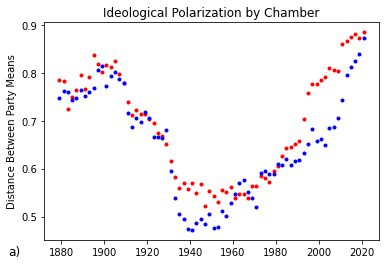

In [275]:
dfHouseBlack = []
for y in range(len(dfHouse)):
    dfHouseBlack.append(dfHouse['rep.mean.d1'][y] - dfHouse['dem.mean.d1'][y])

dfSenateBlack = []
for y in range(len(dfSenate)):
    dfSenateBlack.append(dfSenateRep[y + 72] - dfSenateDem[y + 72])

x = dfHouse['year']

y = dfHouseBlack
mH, bH, _H, pH, eH = st.linregress(x, y)
#plt.plot(x, mH*np.array(x) + bH, color="red")

y = dfSenateBlack
mS, bS, _S, pS, eS = st.linregress(x, y)
#plt.plot(x, mS*np.array(x) + bS, color="blue")

plt.plot(x, dfHouseBlack, marker = '.', linestyle='None', color = 'red')
plt.plot(x, dfSenateBlack, marker = '.', linestyle='None', color = 'blue')
plt.ylabel("Distance Between Party Means")
plt.title("Ideological Polarization by Chamber")
plt.text(1855, 0.42, "a)", fontsize='large')
plt.show()